# This script plots the HI mass against the Star Formation Rate
## General plot for all galaxy types
## Plot separating the types of galaxies: centrals, satellites and orphans
### scatter plots for z=0, z=1
### Contour plots for z=0, z=1

In [1]:
# Code to plot the HI Mass as a function of Halo Mass (Mvir)
# First off, import the packages we need
import numpy as np  # work horse package for numerical work in python
import matplotlib.pyplot as plt  # plotting library
from dragons import meraxes, munge
import random
import sys
import seaborn as sns
from Functions import *


#get gals, snaps, sims_props
snapshot_used = 250 # z = 0
gals, sim_props, snaplist = get_gal_catalogue(snapshot_used)
gals = gals[gals["HIMass"] != 0]# remove all HIMass = 0 rows from gals 

snaplist_index_used = list(snaplist[0]).index(snapshot_used)# convert to list and find the index of the snap we are using
redshift_used = snaplist[1][snaplist_index_used] # Get the redshift for corresponding snapshot
redshift_used = str(round(redshift_used, 1)) # round float to nearest whole int

# Take a random sample of gals (k = 10^4)
#gals_ran = Random_Sample_Gals(gals, 10000)
#gals_ran = gals.sample(n=10000) # take sample of one hundred thousand
#gals_ran
#gals_ran.shape
#gals_ran.columns


# PRINT UNITS
fname_in = "imapping_testrun/meraxes.hdf5"
units = meraxes.read_units(fname_in)
print('\nunits\n=====')
for k, v in units.items():
    if not isinstance(v, dict):
        print(k, ':', v.decode('utf-8'))
print()

In [2]:
# Log the masses 
HIMass = np.log10(gals["HIMass"]*1e10)
print('HIMass: ', HIMass, 'no. items: ', HIMass.shape)
Mvir = np.log10(gals["Mvir"]*1e10)
print('Mvir: ', Mvir, 'no. items: ', HIMass.shape)
Type = gals["Type"]
SFR = gals["Sfr"]

# drop infinities
#HIMass = HIMass[np.isfinite(HIMass)]
#Mvir = Mvir[np.isfinite(Mvir)]
#SFR = SFR[np.isfinite(SFR)]

HIMass:  0          7.562724
1          6.929905
2          6.551321
3          5.180443
4          6.947706
             ...   
1643838    5.992358
1643839    6.341704
1643840    6.049803
1643841    5.420253
1643842    6.273756
Name: HIMass, Length: 1640350, dtype: float64 no. items:  (1640350,)
Mvir:  0          10.410791
1          10.374162
2          11.534210
3           9.984822
4          10.374162
             ...    
1643838     9.782402
1643839     9.782402
1643840     9.782402
1643841     9.782402
1643842     9.782402
Name: Mvir, Length: 1640350, dtype: float64 no. items:  (1640350,)


In [9]:
import pandas as pd
x = np.log10(gals.Sfr) # log the SFR
y = np.log10(gals.HIMass) # log the HIMass
x[x < -1e308] = 0# get rid of infs values
x = pd.cut(x, bins=100) # place continuous variable into 200 bins
y = pd.cut(y, bins=100)
cross_count = pd.crosstab(y, x, margins=False)

/Users/jenkinsfamily/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [10]:
x

1211381   -3.479699
390786    -3.261086
821106    -2.070629
453634    -3.497506
1489127   -4.079326
             ...   
1005371   -1.720960
1414804   -3.201555
1419046   -4.124157
1621909   -5.233728
447870    -4.292826
Name: Sfr, Length: 10000, dtype: float32

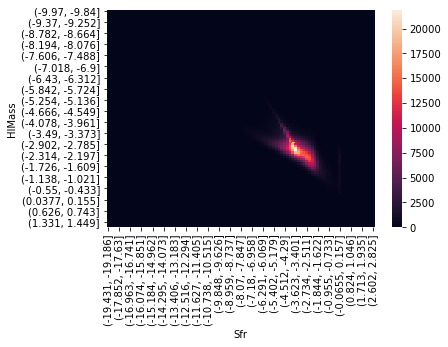

In [10]:
sns.heatmap(cross_count)

<ipython-input-12-d9ec71357e0d>:3: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(cross_count, cmap='hot', label=contour_label)
No handles with labels found to put in legend.


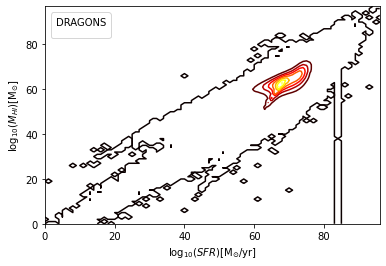

In [12]:
fig, ax = plt.subplots(1, 1)
contour_label=("Contour")
plt.contour(cross_count, cmap='hot', label=contour_label)
ax.set_xlabel(r"$\log_{10}(SFR) [{\rm M_{\odot}/yr}]$")
ax.set_ylabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
plt.legend(title=("DRAGONS"),
           loc='upper left',
           fontsize=12)

name_of_plot=("Alice_MHI_Mvir_contour")
plt.savefig("plots/" + name_of_plot + ".pdf")

# SCATTER PLOT z=0
## All galaxies

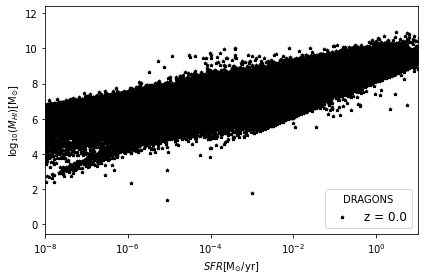

In [6]:
# Now plot the simulation for Cen, Sat and All and the Zwaan 2005 and Martin 2010 dataset on one fig
fig, ax = plt.subplots(1, 1)

label_z = ("z = " + redshift_used)
x = SFR
y = HIMass
plot = ax.scatter(x, y, color= "black", marker= "*", s=10, label=label_z)  

ax.set_xlabel(r"$SFR [{\rm M_{\odot}/yr}]$")
ax.set_ylabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
ax.set_xlim([1e-8,1e1])
plt.xscale('log')

# Add the legend
plt.legend(title=("DRAGONS"),
           loc='lower right',
           ncol=5,
           fontsize=12)

# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("Alice_MHI_SRF" + redshift_used)
plt.savefig("plots/" + name_of_plot + ".pdf")

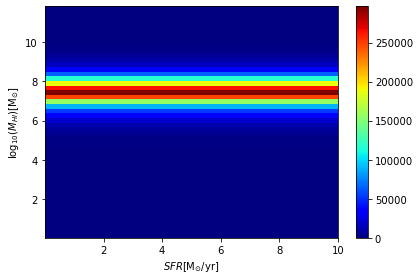

In [7]:
# Now plot the simulation for Cen, Sat and All and the Zwaan 2005 and Martin 2010 dataset on one fig
fig, ax = plt.subplots(1, 1)

label_z = ("z = " + redshift_used)
x = SFR
y = HIMass
#plot = ax.scatter(x, y, color= "black", marker= "*", s=10, label=label_z)  
plot = plt.hist2d(x, y, (50, 50), cmap=plt.cm.jet)


plt.xlabel(r"$SFR [{\rm M_{\odot}/yr}]$")
plt.ylabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
plt.xlim([1e-8,1e1])
#plt.xscale('log')

# Add the legend
'''
plt.legend(title=("DRAGONS"),
           loc='lower right',
           ncol=5,
           fontsize=12)
'''
# Finally save the figure as a PDF
plt.tight_layout()
plt.colorbar()


AttributeError: module 'seaborn' has no attribute 'plt'

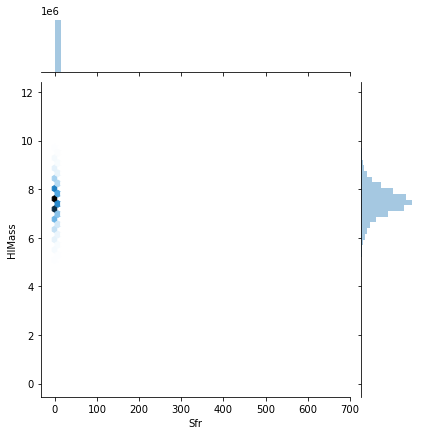

In [8]:
import seaborn as sns
plot = sns.jointplot(x=x, y=y, kind='hex')
#sns.ax.set_xlabel(r"$SFR [{\rm M_{\odot}/yr}]$")
#sns.ax.set_ylabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
sns.plt.xlim(1e-8,1e1)

sns.plt.xscale('log')
plt.show()


In [ ]:
# Now plot the simulation for Cen, Sat and All and the Zwaan 2005 and Martin 2010 dataset on one fig
fig, ax = plt.subplots(1, 1)

x = SFR
y = HIMass
plot = ax.sns.jointplot(x, y, kind='kde', color="blue", space=0)

ax.set_xlabel(r"$SFR [{\rm M_{\odot}/yr}]$")
ax.set_ylabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
ax.set_xlim([1e-8,1e1])
plt.xscale('log')


# Finally save the figure as a PDF
plt.tight_layout()



In [ ]:
from scipy.stats import gaussian_kde
# Now plot the simulation for Cen, Sat and All and the Zwaan 2005 and Martin 2010 dataset on one fig
fig, ax = plt.subplots(1, 1)

label_z = ("z = " + redshift_used)
x = SFR
y = HIMass
#plot = ax.scatter(x, y, color= "black", marker= "*", s=10, label=label_z) 

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

plot = ax.scatter(x, y, c=z, s=100, edgecolor='',label=label_z)

ax.set_xlabel(r"$SFR [{\rm M_{\odot}/yr}]$")
ax.set_ylabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
ax.set_xlim([1e-8,1e1])
plt.xscale('log')

# Add the legend
plt.legend(title=("DRAGONS"),
           loc='lower right',
           ncol=5,
           fontsize=12)

# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("Alice_MHI_SRF" + redshift_used)
plt.savefig("plots/" + name_of_plot + ".pdf")

# SCATTER PLOT z=0
## separated galaxies, Centrals, Satellites, and Orphans

In [ ]:
# Now plot the simulation for Cen, Sat and All and the Zwaan 2005 and Martin 2010 dataset on one fig
fig, ax = plt.subplots(1, 1)

label_z = ("z = " + str(redshift_used))
x = SFR
y = HIMass
all_plt = ax.scatter(x, y, color= "black", marker= "s", s=10)  
centrals_plt = ax.scatter(x[Type==0], y[Type==0], color= "darkmagenta", marker= "o", s=10)  
satellites_plt = ax.scatter(x[Type==1], y[Type==1], color= "palegreen", marker= "+", s=10)  
orphans_plt = ax.scatter(x[Type==2], y[Type==2], color= "gray", marker= "^", s=10)  

ax.set_xlabel(r"$SFR [{\rm M_{\odot}/yr}]$")
ax.set_ylabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
ax.set_xlim([1e-8,1e1])
plt.xscale('log')
# Add the legend
plt.legend((all_plt, centrals_plt, satellites_plt, orphans_plt),
           ('All Galaxies', 'Centrals', 'Satellites', 'Orphans'),
           scatterpoints=1,
           loc='lower right',
           fontsize=12)


# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("Alice_MHI_SFR_CenSatAll" + redshift_used)
plt.savefig("plots/" + name_of_plot + ".pdf")
'''
occurrences_cen = np.count_nonzero(Type == 0)
occurrences_sat = np.count_nonzero(Type == 1)
occurrences_all = np.count_nonzero(gals)
print('Num Centrals = ', occurrences_cen)
print('Num Satellites = ', occurrences_sat)
print('Num All = ', occurrences_all)
'''

# z=1

In [ ]:
#get gals, snaps, sims_props
snapshot_used_1 = 192 # z = 0
gals_1, sim_props_1, snaplist_1 = get_gal_catalogue(snapshot_used_1)

snaplist_index_used_1 = list(snaplist_1[0]).index(snapshot_used_1)# convert to list and find the index of the snap we are using
redshift_used_1 = snaplist_1[1][snaplist_index_used_1] # Get the redshift for corresponding snapshot
redshift_used_1 = str(round(redshift_used_1, 1)) # round float to nearest whole int

# Take a random sample of gals (k = 10^4)
#gals_ran = Random_Sample_Gals(gals, 10000)
gals_ran_1 = gals_1.sample(n=10000)
gals_ran_1
#gals_ran.shape
gals_ran_1.columns


In [ ]:
# Log the masses 
HIMass_1 = np.log10(gals_ran_1["HIMass"]*1e10)
print('HIMass: ', HIMass_1, 'no. items: ', HIMass_1.shape)
Mvir_1 = np.log10(gals_ran_1["Mvir"]*1e10)
print('Mvir: ', Mvir_1, 'no. items: ', Mvir.shape)
Type_1 = gals_ran_1["Type"]
SFR_1 = gals_ran_1["Sfr"]

# drop infinities
#HIMass_1 = HIMass_1[np.isfinite(HIMass_1)]
#Mvir_1 = Mvir_1[np.isfinite(Mvir_1)]
#SFR_1 = SFR_1[np.isfinite(SFR_1)]

# SCATTER PLOT z=1
## All galaxies

In [ ]:
# Now plot the simulation for Cen, Sat and All and the Zwaan 2005 and Martin 2010 dataset on one fig
fig, ax = plt.subplots(1, 1)

label_z_1 = ("z = " + redshift_used_1)
x_1 = SFR_1
y_1 = HIMass_1
plot = ax.scatter(x_1, y_1, color= "black", marker= "*", s=10, label=label_z_1)  

ax.set_xlabel(r"$SFR [{\rm M_{\odot}/yr}]$")
ax.set_ylabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
ax.set_xlim([1e-8,1e1])
plt.xscale('log')

# Add the legend
plt.legend(title=("DRAGONS"),
           loc='upper right',
           ncol=5,
           fontsize=12)

# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("Alice_MHI_SRF" + redshift_used_1)
plt.savefig("plots/" + name_of_plot + ".pdf")

## Separated galaxies: Centrals, Satellites and Orphans.

In [ ]:
# Now plot the simulation for Cen, Sat and All and the Zwaan 2005 and Martin 2010 dataset on one fig
fig, ax = plt.subplots(1, 1)

label_z = ("z = " + str(redshift_used_1))
x_1 = SFR_1
y_1 = HIMass_1
all_plt_1 = ax.scatter(x_1, y_1, color= "black", marker= "s", s=10)  
centrals_plt_1 = ax.scatter(x_1[Type_1==0], y_1[Type_1==0], color= "darkmagenta", marker= "o", s=10)  
satellites_plt_1 = ax.scatter(x_1[Type_1==1], y_1[Type_1==1], color= "palegreen", marker= "+", s=10)  
orphans_plt_1 = ax.scatter(x_1[Type_1==2], y_1[Type_1==2], color= "gray", marker= "^", s=10)  

ax.set_xlabel(r"$SFR [{\rm M_{\odot}/yr}]$")
ax.set_ylabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
ax.set_xlim([1e-8,1e1])
plt.xscale('log')
# Add the legend
plt.legend((all_plt_1, centrals_plt_1, satellites_plt_1,orphans_plt_1 ),
           ('All Galaxies', 'Centrals', 'Satellites', 'Orphans'),
           scatterpoints=1,
           loc='lower right',
           fontsize=12)


# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("Alice_MHI_SFR_CenSatAll" + redshift_used_1)
plt.savefig("plots/" + name_of_plot + ".pdf")
'''
occurrences_cen = np.count_nonzero(Type == 0)
occurrences_sat = np.count_nonzero(Type == 1)
occurrences_all = np.count_nonzero(gals)
print('Num Centrals = ', occurrences_cen)
print('Num Satellites = ', occurrences_sat)
print('Num All = ', occurrences_all)
'''

# Countour Plot 

In [ ]:
# Now plot the simulation for Cen, Sat and All and the Zwaan 2005 and Martin 2010 dataset on one fig
fig, ax = plt.subplots(1, 1)

label_z = ("z = " + str(redshift_used_1))
x = SFR
y = HIMass

heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

ax.set_xlabel(r"$SFR [{\rm M_{\odot}/yr}]$")
ax.set_ylabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
ax.set_xlim([1e-8,1e1])
plt.xscale('log')
# Add the legend



# Finally save the figure as a PDF

plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()






In [ ]:
from matplotlib.colors import LogNorm
fig, ax = plt.subplots(1, 1)

x = SFR
y = HIMass
label_z = ("z = " + redshift_used)

counts,ybins,xbins,image = plt.hist2d(x,y,bins=100,norm=LogNorm())

plot = plt.contour(counts,extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],linewidths=3)

ax.set_xlabel(r"$SFR [{\rm M_{\odot}/yr}]$")
ax.set_ylabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
#ax.set_xlim([1e-8,1e1])
plt.xscale('log')



In [ ]:
counts,ybins,xbins,image = plt.hist2d(x,y,bins=100)
plt.clf()
plt.contour(counts.T, cmap='winter')
plt.xscale('log')
#plt.yscale('log')
plt.xlim([1e-15,1e1])


In [ ]:
counts.sum(axis=0)

In [ ]:
#min(SFR), max(SFR), min(HIMass), max(HIMass)

In [ ]:
#min(SFR_1), max(SFR_1), min(HIMass_1), max(HIMass_1)

In [ ]:
X.shape

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter


def myplot(x, y, s, bins=1000):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent


fig, axs = plt.subplots(2, 2)

# Generate some test data
x = SFR
y = HIMass

sigmas = [0, 16, 32, 64]

for ax, s in zip(axs.flatten(), sigmas):
    if s == 0:
        ax.plot(x, y, 'k.', markersize=5)
        ax.set_title("Scatter plot")
        
    else:
        img, extent = myplot(x, y, s)
        ax.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
        ax.set_title("Smoothing with  $\sigma$ = %d" % s)

plt.show()

In [ ]:
#pltcontour = plt.contour(x, y, z)
fig, ax = plt.subplots()
CS = ax.contour(x, y, z)

In [ ]:
import numpy as np; np.random.seed(0)
import seaborn as sns
x = SFR
y = HIMass
data = [x,y]
ax = sns.heatmap(data)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter

x = SFR
y = HIMass
nbins=100
s=1
heatmap, xedges, yedges = np.histogram2d(x, y, bins=nbins)
heatmap = gaussian_filter(heatmap, sigma=s)
heatmap = heatmap.T 

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

fig, ax = plt.subplots(1, 1)
ax.set_xlim([1e-10,1e1])
plt.xscale('log')
# Generate some test data


img, extent = myplot(x, y, s)
ax.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
ax.set_title("Smoothing with  $\sigma$ = %d" % s)

plt.show()

In [ ]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

In [ ]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 1)

# Generate some test data
x = SFR
y = HIMass

heatmap, xedges, yedges = np.histogram2d(x, y, bins=100)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

ax = sns.heatmap(z, xticklabels=[1e-10,1e1])

ax.set_xlim([1e-10,1e1])
plt.xscale('log')
plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

origin = 'lower'

delta = 0.025

x = y = np.arange(-3.0, 3.01, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

nr, nc = Z.shape

# put NaNs in one corner:
Z[-nr // 6:, -nc // 6:] = np.nan
# contourf will convert these to masked


Z = np.ma.array(Z)
# mask another corner:
Z[:nr // 6, :nc // 6] = np.ma.masked

# mask a circle in the middle:
interior = np.sqrt(X**2 + Y**2) < 0.5
Z[interior] = np.ma.masked

# We are using automatic selection of contour levels;
# this is usually not such a good idea, because they don't
# occur on nice boundaries, but we do it here for purposes
# of illustration.

fig1, ax2 = plt.subplots(constrained_layout=True)
CS = ax2.contourf(X, Y, Z, 10, cmap=plt.cm.bone, origin=origin)

# Note that in the following, we explicitly pass in a subset of
# the contour levels used for the filled contours.  Alternatively,
# We could pass in additional levels to provide extra resolution,
# or leave out the levels kwarg to use all of the original levels.

CS2 = ax2.contour(CS, levels=CS.levels[::2], colors='r', origin=origin)

ax2.set_title('Nonsense (3 masked regions)')
ax2.set_xlabel('word length anomaly')
ax2.set_ylabel('sentence length anomaly')

# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel('verbosity coefficient')
# Add the contour line levels to the colorbar
cbar.add_lines(CS2)

fig2, ax2 = plt.subplots(constrained_layout=True)
# Now make a contour plot with the levels specified,
# and with the colormap generated automatically from a list
# of colors.
levels = [-1.5, -1, -0.5, 0, 0.5, 1]
CS3 = ax2.contourf(X, Y, Z, levels,
                   colors=('r', 'g', 'b'),
                   origin=origin,
                   extend='both')
# Our data range extends outside the range of levels; make
# data below the lowest contour level yellow, and above the
# highest level cyan:
CS3.cmap.set_under('yellow')
CS3.cmap.set_over('cyan')

CS4 = ax2.contour(X, Y, Z, levels,
                  colors=('k',),
                  linewidths=(3,),
                  origin=origin)
ax2.set_title('Listed colors (3 masked regions)')
ax2.clabel(CS4, fmt='%2.1f', colors='w', fontsize=14)

# Notice that the colorbar gets all the information it
# needs from the ContourSet object, CS3.
fig2.colorbar(CS3)

# Illustrate all 4 possible "extend" settings:
extends = ["neither", "both", "min", "max"]
cmap = plt.cm.get_cmap("winter")
cmap.set_under("magenta")
cmap.set_over("yellow")
# Note: contouring simply excludes masked or nan regions, so
# instead of using the "bad" colormap value for them, it draws
# nothing at all in them.  Therefore the following would have
# no effect:
# cmap.set_bad("red")

fig, axs = plt.subplots(2, 2, constrained_layout=True)

for ax, extend in zip(axs.ravel(), extends):
    cs = ax.contourf(X, Y, Z, levels, cmap=cmap, extend=extend, origin=origin)
    fig.colorbar(cs, ax=ax, shrink=0.9)
    ax.set_title("extend = %s" % extend)
    ax.locator_params(nbins=4)

plt.show()

In [ ]:
from matplotlib.colors import LogNorm
from matplotlib.pyplot import *

x = np.array(SFR)
y = np.array(HIMass)
counts,ybins,xbins,image = plt.hist2d(x,y,bins=10,norm=LogNorm(),range=range_hist)
plt.contour(counts,extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],linewidths=3)
